In [62]:
import numpy as np
import pylab as plt
%matplotlib inline
import seaborn as sns
import scipy.stats as sps
import pandas as pd

# Задание 1

In [63]:
def p(x, mean, std):
    return 1 / (std * (2 * np.pi)**0.5) * np.exp(-(x-mean)**2 / (2 * std**2))

Text(0, 0.5, 'P(X)')

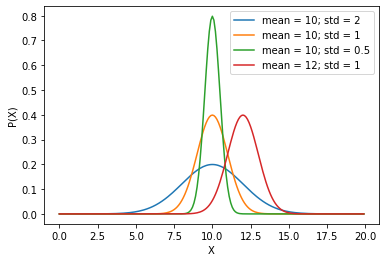

In [64]:
x = np.arange(0, 20, 0.1)
mean = [10, 10, 10, 12]
std = [2, 1, 0.5, 1]
label = ["mean = 10; std = 2", "mean = 10; std = 1", "mean = 10; std = 0.5", "mean = 12; std = 1"]
y = []
for i in range(4):
    y.append([p(x_value, mean[i], std[i]) for x_value in x])
    plt.plot(x, y[i], label=label[i])
plt.legend()
plt.xlabel('X')
plt.ylabel('P(X)')

# Задание 2

In [65]:
from scipy import special
def distribut_func(x, mean, std):
    return 1/2 * (1 + special.erf((x-mean) / (std * 2**0.5)))

Text(0, 0.5, 'distribution function')

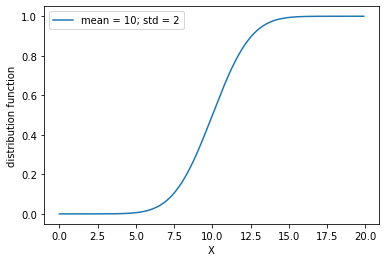

In [66]:
mean = 10
std = 2
y_distribut = distribut_func(x, mean, std)
plt.plot(x, y_distribut, label="mean = 10; std = 2")
plt.legend()
plt.xlabel('X')
plt.ylabel('distribution function')

# Задание 3

In [67]:
def cdf_inverse(p):
    for i in range(len(y_distribut)):
        if y_distribut[i] > p:
            p1 = y_distribut[i - 1]
            p2 = y_distribut[i]
            x1 = x[i - 1]
            x2 = x[i]
            z = (p * (x2-x1) - p1*x2 + p2*x1) / (p2-p1)
            return z
        
def generation_num(arr_num_values):
    sales = {}
    for i, num in enumerate(arr_num_values):
        random_list = np.random.random(num)
        values = []
        
        for elem in random_list:
            cdf_inverse_num = cdf_inverse(elem)
            values.append(cdf_inverse_num)
            
        title_stb = "Выборка №{}".format(i+1)
        sales[title_stb] = pd.Series(values, dtype="float64")
    return pd.DataFrame(data=sales)

In [68]:
df = generation_num([10**2, 10**3, 10**4, 10**5, 10**6])

In [69]:
df.head()

,Выборка №1,Выборка №2,Выборка №3,Выборка №4,Выборка №5
0,4.841326,12.203230,11.836684,10.579908,11.621867
1,12.578208,10.135502,7.487293,9.359567,9.014964
2,9.004145,11.549666,6.221909,10.522493,9.434335
3,14.696989,11.279400,10.352800,11.089985,8.503117
4,9.684488,9.884623,10.939013,12.199246,11.444825


# Задание 4

In [70]:
def create_histogram(df, bins):
    fig, axes = plt.subplots(1, len(df.columns), figsize=(20, 5))
    for i, elem in enumerate(df.columns):
        axes[i].hist(df[elem], bins, density=True, width=0.85)
        axes[i].set_title(f"N = 10^{i+2}")
        axes[i].set_xlabel("X")
        axes[i].set_ylabel("относительная частота")
    plt.subplots_adjust(wspace=0.4)

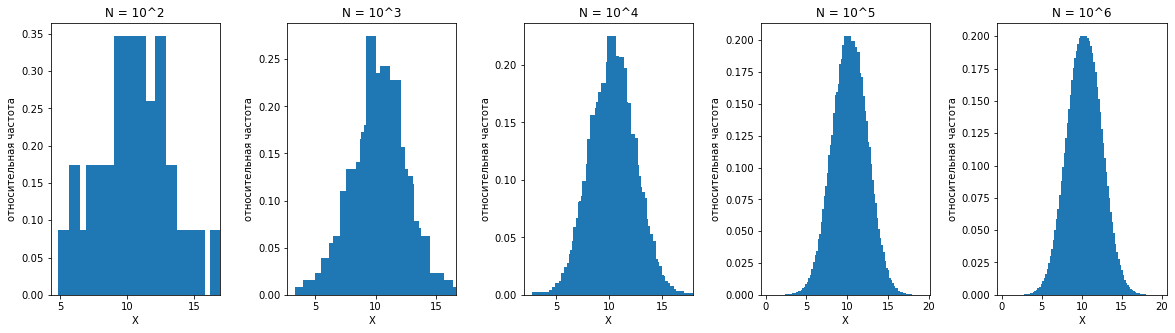

In [71]:
create_histogram(df, 100)

# Задание 5

In [85]:
mean_square = []
print("Cредняя квадратичная погрешность между полученным экспериментальным распределением и теоретическим для числа экспериментов:")
for i, column in enumerate(df.columns):
    temp = df[column].std()
    print(f"N = 10^{i + 2}: {temp}")
    mean_square.append(temp)

Cредняя квадратичная погрешность между полученным экспериментальным распределением и теоретическим для числа экспериментов:
N = 10^2: 2.279757908982703
N = 10^3: 2.010012009915511
N = 10^4: 1.9886444526184337
N = 10^5: 2.005915706192095
N = 10^6: 2.002357724312592


Text(0.5, 1.0, 'Зависимости средней квадратичной погрешности от числа экспериментов\n')

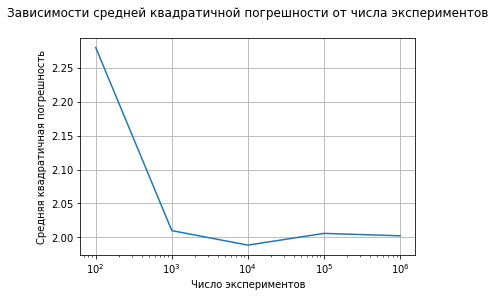

In [88]:
plt.plot([10**2, 10**3, 10**4, 10**5, 10**6], mean_square)
plt.xlabel("Число экспериментов")
plt.ylabel("Cредняя квадратичная погрешность")
plt.xscale('log')
plt.grid()
plt.title("Зависимости средней квадратичной погрешности от числа экспериментов\n")